In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from matplotlib import pyplot as plt

import numpy as np

In [3]:
import auttitude as at

In [4]:
from math import radians, degrees

In [5]:
at.sphere_plane(at.dcos_plane(((120,30), (80, 60))))

array([[ 120.,   30.],
       [  80.,   60.]])

In [6]:
data_lines = at.SphericalData(at.dcos_line(((60, 45), (200, 60), (250, 15))))

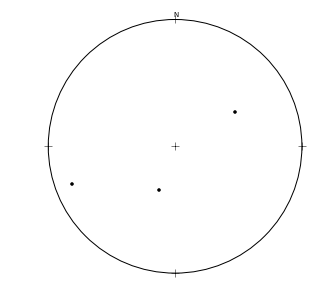

In [7]:
fig, ax = plt.subplots(figsize=(5, 5))
plot = at.ProjectionPlot(ax)
plot.clear_diagram()
plot.plot_poles(data_lines)

In [8]:
x = at.Plane(at.dcos_plane((60, 45)))
x_ = at.Line(at.dcos_rake((60, 45, 30)))
y = at.Plane(at.dcos_plane((200, 60)))
z = at.Plane(at.dcos_plane((135, 60)))

29.99999999999998

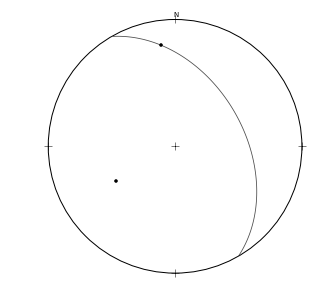

In [9]:
fig, ax = plt.subplots(figsize=(5, 5))
plot = at.ProjectionPlot(ax)
plot.clear_diagram()
plot.plot_poles(x)
plot.plot_circles(x.great_circle())
plot.plot_poles(x_)
degrees(x.direction_vector.angle(x_))

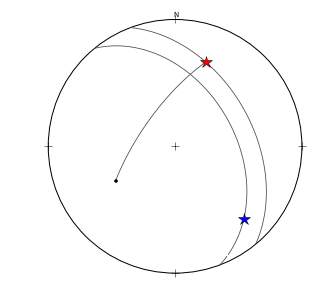

In [10]:
fig, ax = plt.subplots(figsize=(5, 5))
plot = at.ProjectionPlot(ax)
plot.clear_diagram()
plot.plot_poles(x)
plot.plot_poles(y, marker='*', ms=12, c='r')
plot.plot_poles(x.rotation_matrix(30).dot(y), marker='*', ms=12, c='b')
plot.plot_circles(x.small_circle(x.angle(y)))
plot.plot_circles(x.arc(y))

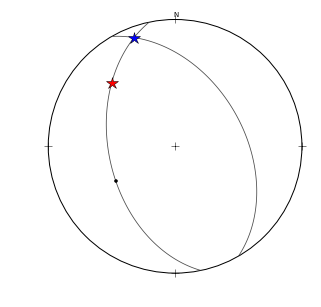

In [11]:
fig, ax = plt.subplots(figsize=(5, 5))
plot = at.ProjectionPlot(ax)
plot.clear_diagram()
plot.plot_poles(x)
plot.plot_circles(x.great_circle())
plot.plot_poles(z, marker='*', ms=12, c='r')
plot.plot_poles(x.rejection_matrix.dot(z), marker='*', ms=12, c='b')
plot.plot_circles(x.intersect(z).great_circle())

In [12]:
data_planes = at.PlaneData(at.dcos_plane(((60, 60), (200, 60), (250, 15))))

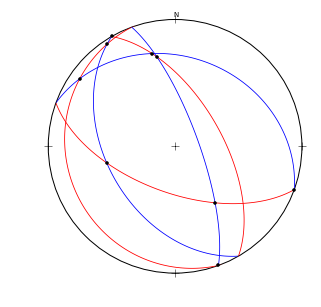

In [13]:
fig, ax = plt.subplots(figsize=(5, 5))
plot = at.ProjectionPlot(ax)
plot.clear_diagram()
#plot.plot_poles(data_planes)
plot.plot_circles(data_planes.great_circle(), color='r')
plot.plot_circles(data_lines.great_circle(), color='b')
plot.plot_poles(data_planes.intersection(data_lines))

In [14]:
data = at.PlaneData(at.dcos_plane(np.loadtxt("tocher.txt")))

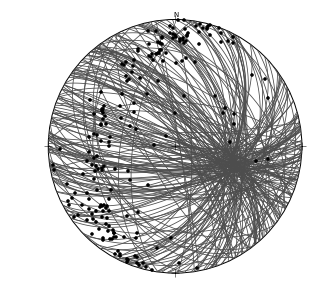

In [15]:
fig, ax = plt.subplots(figsize=(5, 5))
plot = at.ProjectionPlot(ax)
plot.clear_diagram()
plot.plot_poles(data)
plot.plot_circles(data.great_circle())

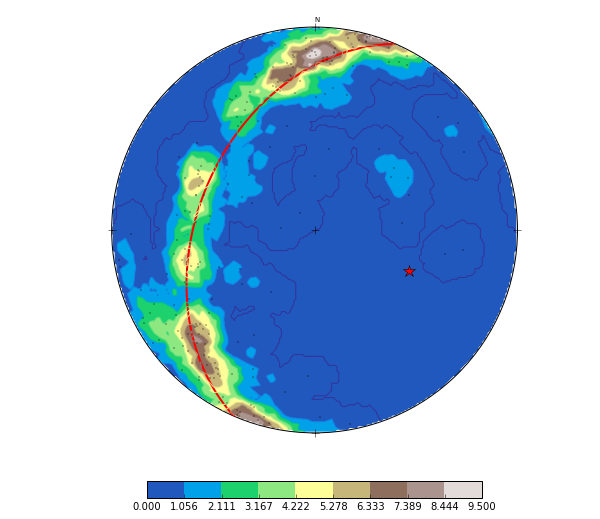

In [16]:
fig, ax = plt.subplots(figsize=(10, 10))
plot = at.ProjectionPlot(ax)
data = at.PlaneData(at.dcos_plane(np.loadtxt("tocher.txt")))
plot.clear_diagram()
plot.plot_poles(data, ms=.5)
fit_plane = data.stats.eigenvectors[2]
plot.plot_poles(fit_plane, marker='*', ms=12, c='r')
plot.plot_circles(fit_plane.great_circle(), linewidths=2, color='r')
c = plot.plot_contours(at.default_grid.grid, data.count_kamb(), len(data), cmap='terrain')
plt.colorbar(c, shrink=.6, orientation='horizontal', pad=.05)

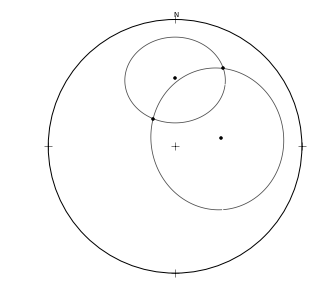

In [17]:
fig, ax = plt.subplots(figsize=(5, 5))
plot = at.ProjectionPlot(ax)
plot.clear_diagram()
a_ = at.Line(at.dcos_line((0, 45)))
b_ = at.Line(at.dcos_line((80, 60)))
plot.plot_poles(a_)
plot.plot_circles(a_.small_circle(radians(30.)))
plot.plot_poles(b_)
plot.plot_circles(b_.small_circle(radians(45.)))
intersection = at.small_circle_intersection(a_, radians(30), b_, radians(45))
plot.plot_poles(intersection)

Phi= 0.101985859154


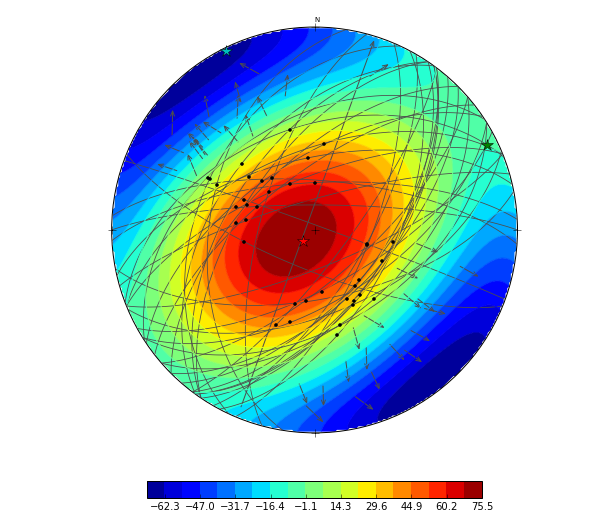

In [18]:
angelier = np.loadtxt("Angelier_1979.txt", usecols=(0, 1, 2, 3), delimiter='\t')
angelier[:,0] += 90

angelier_planes = at.PlaneData(at.dcos_plane(angelier[:,:2]))
angelier_lines = at.LineData(at.dcos_line(angelier[:,2:]))

stress_matrix, residuals = at.stress.michael(angelier_planes, angelier_lines)
stress_directions, (s1, s2, s3) = at.stress.principal_stresses(stress_matrix)
print "Phi=", (s2-s3)/(s1-s3)

angelier_dihedra = at.stress.angelier_graphical(angelier_planes, angelier_lines)

fig, ax = plt.subplots(figsize=(10, 10))
plot = at.ProjectionPlot(ax)
plot.clear_diagram()
plot.plot_poles(angelier_lines)
plot.plot_circles(angelier_planes.great_circle())
plot.plot_poles(stress_directions[0], marker='*', ms=12, c='r') #compressive
plot.plot_poles(stress_directions[1], marker='*', ms=12, c='g') #intermediate
plot.plot_poles(stress_directions[2], marker='*', ms=12, c='c') #distensive
plot.plot_slip_linear(angelier_planes, angelier_lines, True)
c = plot.plot_contours(at.default_grid.grid, angelier_dihedra, len(angelier_planes), 20, cmap='jet')
plt.colorbar(c, shrink=.6, orientation='horizontal', pad=.05)

Phi= 0.481380607434


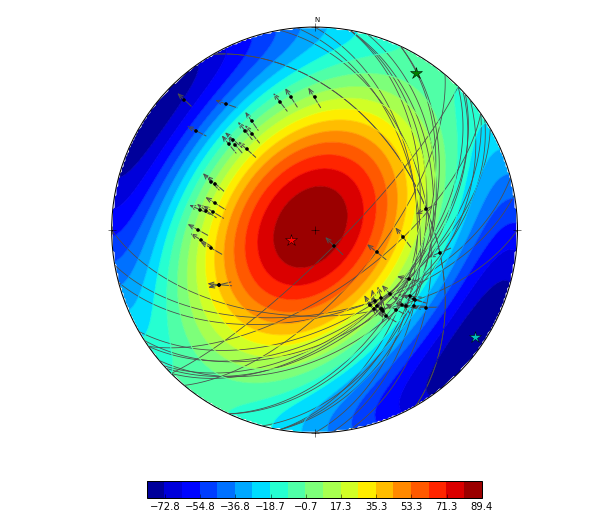

In [19]:
dixie = np.loadtxt("dixie.txt", skiprows=1, delimiter=' ')
dixie[:, 2] *= -1

dixie_planes = at.PlaneData(at.dcos_plane(dixie[:,:2]))
dixie_lines = at.LineData(at.dcos_rake(dixie))

stress_matrix, residuals = at.stress.michael(dixie_planes, dixie_lines)
stress_directions, (s1, s2, s3) = at.stress.principal_stresses(stress_matrix)
print "Phi=", (s2-s3)/(s1-s3)

dixie_dihedra = at.stress.angelier_graphical(dixie_planes, dixie_lines)

fig, ax = plt.subplots(figsize=(10, 10))
plot = at.ProjectionPlot(ax)
plot.clear_diagram()
plot.plot_poles(dixie_lines)
plot.plot_poles(dixie_planes)
plot.plot_circles(dixie_planes.great_circle())
plot.plot_poles(stress_directions[0], marker='*', ms=12, c='r') #compressive
plot.plot_poles(stress_directions[1], marker='*', ms=12, c='g') #intermediate
plot.plot_poles(stress_directions[2], marker='*', ms=12, c='c') #distensive
plot.plot_slickenlines(dixie_planes, dixie_lines, True)
plot.plot_slip_linear(dixie_planes, dixie_lines, True)
c = plot.plot_contours(at.default_grid.grid, dixie_dihedra, len(dixie_planes), 20, cmap='jet')
plt.colorbar(c, shrink=.6, orientation='horizontal', pad=.05)

Phi= 0.0376033290839


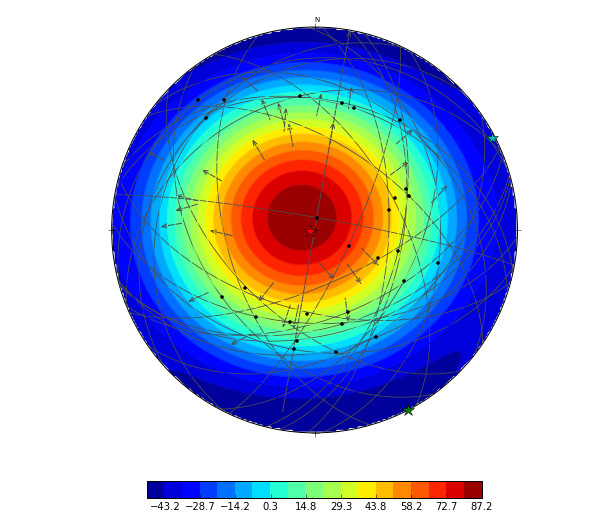

In [20]:
normal = np.loadtxt("normal_faults.txt", usecols=(0, 1, 2, 3), delimiter='\t')

normal_planes = at.PlaneData(at.dcos_plane(normal[:,:2]))
normal_lines = at.LineData(at.dcos_line(normal[:,2:]))

stress_matrix, residuals = at.stress.michael(normal_planes, normal_lines)
stress_directions, (s1, s2, s3) = at.stress.principal_stresses(stress_matrix)
print "Phi=", (s2-s3)/(s1-s3)

normal_dihedra = at.stress.angelier_graphical(normal_planes, normal_lines)

fig, ax = plt.subplots(figsize=(10, 10))
plot = at.ProjectionPlot(ax)
plot.clear_diagram()
plot.plot_poles(normal_lines)
plot.plot_circles(normal_planes.great_circle())
plot.plot_poles(stress_directions[0], marker='*', ms=12, c='r') #compressive
plot.plot_poles(stress_directions[1], marker='*', ms=12, c='g') #intermediate
plot.plot_poles(stress_directions[2], marker='*', ms=12, c='c') #distensive
plot.plot_slip_linear(normal_planes, normal_lines, True)
c = plot.plot_contours(at.default_grid.grid, normal_dihedra, len(normal_planes), 20, cmap='jet')
plt.colorbar(c, shrink=.6, orientation='horizontal', pad=.05)